In [1447]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<span style="color:#ff6666; font-weight:bold; font-size:40px;">Data Exploration and Cleaning</span>

In [1449]:
# csv dosyaları yüklendi

survey = pd.read_csv("CSAT_Survey_Data.csv")
customer_age = pd.read_csv("Customer_Age_Data.csv")
customer_MRR = pd.read_csv("Customer_MRR_Data.csv")
customer_Revenue = pd.read_csv("Customer_Revenue_Data.csv")
help_Ticket = pd.read_csv("Help_Ticket_Data.csv")
newsletter_Interaction = pd.read_csv("Newsletter_Interaction_Data.csv")
product_Bug_Task = pd.read_csv("Product_Bug_Task_Data.csv")
regionAndVertical = pd.read_csv("RegionAndVertical_Data.csv")
statusAndLevel = pd.read_csv("StatusAndLevel_Data.csv")

<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍Survey Verisi Analizi</span>

In [1451]:
survey

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...
...,...,...,...,...,...,...,...,...,...,...,...
1984,CRM-155450,2022,1,2022-01-01,2022-03-30,7,3,Once a Day,3,3.0,I need someone from Insider team to provide me...
1985,CRM-155450,2022,2,2022-04-01,2022-06-30,6,3,Once a Week,4,4.0,I need someone from Insider team to provide me...
1986,CRM-155450,2022,3,2022-07-01,2022-09-29,7,4,Once a Week,4,4.0,I need someone from Insider team to provide me...
1987,CRM-1499600,2022,1,2022-01-01,2022-03-31,5,3,Once a Day,3,5.0,I am able to report everything easily


#### 📑 Yukarıdaki survey dataframe'den anlaşılanlar
- **Year:**  sadece 2022 yılına ait anketler var
- **Survey Date:**  anketin gönderim tarihi(ilerleyen kod satırlarında, yılın üç farklı günlerinde gönderildiği anlaşılıyor)
- **Response Date:**  yanıtlanan tarih(ilerleyen kod satırlarında, herhangi bir kullanıcının bir anketi birden fazla kez doldurduğu anlaşılıyor)
- **How likely are you to recommend insider to a friend or colleague**:  çevresine önerme puanı(1-10)
- **How would you rate the value you gain from our company:**  şirketten kazanılan değerin puanı(1-5)
- **How frequently are you using our platform:**  platformu kullanma sıklığı(ilerleyen kod satırlarında, burada 3 farklı seçenek olduğu anlaşılıyor)
- **Please rate the overall quality of our products:**  ürünlerin genel kalitesinin puanı(1-10)
- **Please rate the usability of the panel:**  panel kullanılabilirliğinin puanı(1-10)
- **Please rate your understanding of our reporting capabilities in the panel:**  paneldeki raporlamanın puanlaması (ilerleyen kod satırlarında, burada 5 farklı seçenek olduğu anlaşılıyor)

In [1453]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 11 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                1989 non-null   object 
 1   Year                                                                       1989 non-null   int64  
 2   Quarter                                                                    1989 non-null   int64  
 3   Survey Date                                                                1989 non-null   object 
 4   Response Date                                                              1989 non-null   object 
 5   How likely are you to recommend insider to a friend or colleague           1989 non-null   int64  
 6   How would you rate the value you gain from our company  

#### 📌 ⬇️"Please rate the usability of the panel" : bu kolonda eksik değerler var bunlar ortalama değerler ile doldurulmuştur.


In [1455]:
survey.fillna({"Please rate the usability of the panel": survey["Please rate the usability of the panel"].mean()}, inplace=True)

#### 📌 ⬇️"How frequently are you using our platform" : bu kolonda 3 hücre null bunlar en çok tekrar eden ile doldurulmuştur.


In [1457]:
survey.fillna({"How frequently are you using our platform": survey["How frequently are you using our platform"].mode()[0]}, inplace=True)

#### ⬇️📌 Sayısal olmayan iki kolon var onlar sayısal değere dönüştürülmüştür.

In [1459]:
# bu yapacağım veri türü değişimi için gerekli olan isimleri verecek
survey["How frequently are you using our platform"].value_counts()

How frequently are you using our platform
Once a Day      942
Once a Week     770
Once a Month    277
Name: count, dtype: int64

In [1460]:
# bu yapacağım veri türü değişimi için gerekli olan isimleri verecek
survey["Please rate your understanding of our reporting capabilities in the panel"].value_counts()

Please rate your understanding of our reporting capabilities in the panel
I am able to report everything easily                                       695
I need someone from Insider team to provide me the report from the panel    500
I tried but could not find everything I need                                324
I don't use it often                                                        284
I can pull all the numbers, but don't understand them                       186
Name: count, dtype: int64

In [1461]:
# sayı türüne dönüştürüldü.

sayısal_veri_freq = {
    "Once a Day": 3,
    "Once a Week": 2,
    "Once a Month": 1
}

sayısal_veri_reporting = {
    "I am able to report everything easily": 4,  
    "I can pull all the numbers, but don't understand them": 3,
    "I need someone from Insider team to provide me the report from the panel": 2,
    "I tried but could not find everything I need": 1,
    "I don't use it often": 0  
}
survey["How frequently are you using our platform"] = survey["How frequently are you using our platform"].map(sayısal_veri_freq)
survey["Please rate your understanding of our reporting capabilities in the panel"] = survey["Please rate your understanding of our reporting capabilities in the panel"].map(sayısal_veri_reporting)


#### 📌 ⬇️Anketlerin ne kadar sıklıkta gönderildiği incelendi. Yıl ortasında gönderilen anketlerin daha fazla yanıtlandığı görülmüştür.

In [1463]:
survey["Survey Date"].value_counts()

Survey Date
2022-07-01    784
2022-01-01    608
2022-04-01    597
Name: count, dtype: int64

#### 📌 ⬇️Her bir müşterinin kaç defa anket doldurulduğu incelenmiştir.

In [1464]:
survey["Customer ID"].value_counts()

Customer ID
CRM-1486150    12
CRM-1438700    10
CRM-164850     10
CRM-1482200    10
CRM-1455200    10
               ..
CRM-419600      1
CRM-1468750     1
CRM-1522100     1
CRM-161800      1
CRM-806850      1
Name: count, Length: 640, dtype: int64

#### 📌 ⬇️Belirli bir müşterinin anket yanıtlarını incelemek için 'Customer ID' sütunu üzerinden filtreleme yapılmıştır ve CRM-1486150 ID’sine sahip müşterinin yanıtları analiz edilmiştir.

In [1465]:
survey[survey["Customer ID"]=="CRM-1486150"]

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
1565,CRM-1486150,2022,1,2022-01-01,2022-03-01,10,5,3,5,4.036364,4
1566,CRM-1486150,2022,1,2022-01-01,2022-03-21,10,5,3,5,4.036364,4
1567,CRM-1486150,2022,2,2022-04-01,2022-05-10,8,4,3,4,4.000000,2
1568,CRM-1486150,2022,3,2022-07-01,2022-07-28,10,5,3,5,5.000000,4
1569,CRM-1486150,2022,1,2022-01-01,2022-02-01,8,4,2,3,4.000000,4
1570,CRM-1486150,2022,1,2022-01-01,2022-03-21,8,4,2,3,4.000000,4
1571,CRM-1486150,2022,3,2022-07-01,2022-08-17,9,5,2,5,5.000000,0
1572,CRM-1486150,2022,3,2022-07-01,2022-07-26,10,5,1,4,4.000000,3
1573,CRM-1486150,2022,1,2022-01-01,2022-03-01,10,4,3,4,5.000000,4
1574,CRM-1486150,2022,1,2022-01-01,2022-03-21,10,4,3,4,5.000000,4



#### 📑 Yukarıdaki dataframe'den anlaşılanlar
- Anket verisinde yıl içinde 3 farklı tarihte anket gönderimi olmuş. Ve veri içerisinde aynı kullanıcılar bu anketleri belirli bir süre sonra doldurmuş.
- Ayrıca, yukarıda bir kullanıcının doldurmuş olduğu anketler listelenmiş ve aynı anketin tekrar tekrar doldurulduğu görülüyor.  
- Bu verilerin ortalama ve en sık tekrar eden değerlerini alarak her kullanıcı için tek bir anket girdisi oluşturacağım.  

  


#### 📌 ⬇️Her bir müşteri için tek bir anket girdisi oluşturmadan önce ihtiyacım olmayan kolonlar çıkartılmıştır.

In [1467]:
survey = survey.drop(columns=[
    "Year",
    "Quarter",
    "Survey Date",
    "Response Date"
])

In [1468]:
# Tek bir anket girdisi oluşturulmuştur.

# numeric ve nonumeric kolonlar belirlendi
sayısal_kolonlar = survey.select_dtypes(include="number").columns
sayısal_olmayan_kolonlar = survey.select_dtypes(exclude="number").columns.difference(["Customer ID"])

# sayısal veriler için ortalama alındı
ort_say_kol = survey.groupby("Customer ID")[sayısal_kolonlar].mean()

# sayısal olmayan veriler için id'ye göre gruplandırma yapıldı ve her grup içinde mod değerler belirlendi
mod_say_olm_kol = survey.groupby("Customer ID")[sayısal_olmayan_kolonlar].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# ayırdığım sayısal ve sayısal olmayan verileri birleştirme
survey = ort_say_kol.join(mod_say_olm_kol).reset_index()


In [1469]:
survey # son hali

,Customer ID,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1002400,9.000000,4.000000,1.000000,3.750000,3.518182,2.000000
1,CRM-1006000,10.000000,5.000000,2.000000,5.000000,4.036364,3.000000
2,CRM-1019500,8.500000,4.250000,3.000000,4.250000,4.268182,4.000000
3,CRM-1025800,7.500000,4.000000,2.000000,4.000000,4.000000,4.000000
4,CRM-1030300,9.000000,3.666667,2.000000,3.666667,4.678788,1.833333
...,...,...,...,...,...,...,...
635,CRM-960300,9.600000,4.800000,1.800000,4.600000,4.400000,2.800000
636,CRM-983600,8.750000,4.500000,3.000000,4.500000,3.750000,0.250000
637,CRM-993250,8.500000,5.000000,3.000000,3.500000,3.500000,2.500000
638,CRM-998800,8.333333,4.000000,2.333333,3.666667,3.678788,2.333333


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍 customer_age Verisi Analizi</span>

In [1472]:
customer_age

,CRM ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12
...,...,...
2646,CRM-1499600,17
2647,CRM-1594350,4
2648,CRM-1451550,28
2649,CRM-1494200,12


In [1473]:
customer_age.info() # boş hücre görülmüyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CRM ID                 2651 non-null   object
 1   Customer Age (Months)  2651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.6+ KB


#### 📑⬇️Ortalama 1.5 yıllık kullanıcılar olduğu görülüyor. 1 aydan 5 yıla kadar değerler aldığı görülüyor

In [1474]:
customer_age.describe() # 

,Customer Age (Months)
count,2651.000000
mean,20.077707
std,16.427542
min,1.000000
25%,7.000000
50%,15.000000
75%,27.000000
max,72.000000


#### 📌⬇️Bu dosyada ileride merge ederken sorun çıkartmaması için kolon ismini yeniden oluşturacağım. 

In [1476]:
# Diğer dosyalara uyumlu olması için kolon ismi değiştirilmiştir.
customer_age.rename(columns={"CRM ID": "Customer ID"}, inplace=True)

<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍customer_MRR Verisi Analizi</span>

In [1478]:
customer_MRR

,Customer ID,MRR
0,CRM-5454800,"$8,212"
1,CRM-5479950,"$2,026"
2,CRM-5494800,"$2,100"
3,CRM-5598450,"$2,900"
4,CRM-5602550,"$1,898"
...,...,...
1375,CRM-499900,$663
1376,CRM-185300,"$6,500"
1377,CRM-565500,"$10,000"
1378,CRM-571300,"$1,521"


#### 📌⬇️Boş hücre yok fakat sayısal olması gereken MRR kolonu string türünde. Bunu sayısal bir değere dönüştüreceğim sonrasındaki korelasyonlar ve çıkarımlar için gerekli olacak

In [1479]:
customer_MRR.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  1380 non-null   object
 1   MRR          1380 non-null   object
dtypes: object(2)
memory usage: 21.7+ KB


In [1480]:
# girdi formatımız şu şekilde ----> "$6,500" Bunu gerçekleştirmek için bir fonksiyon yazacağım ve kolona uygulayacağım

def sayısala(mrr):
    mrr = int(mrr.replace("$", "").replace(",", ""))
    return mrr
    
customer_MRR["MRR"] = customer_MRR["MRR"].apply(sayısala)

#### 📑⬇️Müşterilerin şirkete aylık olarak ödedikleri ortalama 3933 dolar olarak gözüküyor

In [1481]:
customer_MRR.describe() 

,MRR
count,1380.000000
mean,3933.708696
std,5279.234169
min,26.000000
25%,1152.250000
50%,2424.000000
75%,4680.250000
max,62732.000000


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍customer_Revenue Verisi Analizi</span>

In [1483]:
customer_Revenue

,Customer ID,Total Revenue
0,CRM-1470950,"$732,199"
1,CRM-1526100,$0
2,CRM-1506400,"$375,135"
3,CRM-1430550,$0
4,CRM-1485600,"$116,732"
...,...,...
896,CRM-783450,"$16,527"
897,CRM-1500500,$0
898,CRM-155450,"$567,026"
899,CRM-1499600,"$15,967,518"


#### 📌⬇️Elde edilen toplam geliri gösteren kolon string türünden integera dönüştürmüştür

In [1484]:
customer_Revenue.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    901 non-null    object
 1   Total Revenue  901 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [1485]:
# toplam gelir sayısal formata dönüştürüldü

customer_Revenue["Total Revenue"] = customer_Revenue["Total Revenue"].apply(sayısala)

In [1486]:
customer_Revenue

,Customer ID,Total Revenue
0,CRM-1470950,732199
1,CRM-1526100,0
2,CRM-1506400,375135
3,CRM-1430550,0
4,CRM-1485600,116732
...,...,...
896,CRM-783450,16527
897,CRM-1500500,0
898,CRM-155450,567026
899,CRM-1499600,15967518


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍help_Ticket Verisi Analizi</span>

In [1488]:
help_Ticket

,Customer ID,Help Ticket Count,Help Ticket Lead Time (hours)
0,CRM-1516050,9,418
1,CRM-1467150,8,382
2,CRM-1470950,30,366
3,CRM-1526100,4,1206
4,CRM-1506400,22,484
...,...,...,...
1362,CRM-155450,49,348
1363,CRM-993300,6,1752
1364,CRM-1499600,11,1684
1365,CRM-1451550,1,1160


In [1489]:
help_Ticket.info() # boş hücre yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer ID                    1367 non-null   object
 1   Help Ticket Count              1367 non-null   int64 
 2   Help Ticket Lead Time (hours)  1367 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 32.2+ KB


In [1490]:
help_Ticket.describe()

,Help Ticket Count,Help Ticket Lead Time (hours)
count,1367.000000,1367.000000
mean,17.397952,786.302853
std,25.354291,672.856978
min,1.000000,0.000000
25%,3.000000,387.500000
50%,9.000000,603.000000
75%,22.000000,976.000000
max,443.000000,11632.000000


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍newsletter_Interaction Verisi Analizi</span>

In [1492]:
newsletter_Interaction

,Customer ID,Company Newsletter Interaction Count
0,CRM-160150,54
1,CRM-166800,27
2,CRM-927200,24
3,CRM-1526050,23
4,CRM-1489600,20
...,...,...
246,CRM-1464000,1
247,CRM-1541850,1
248,CRM-277650,1
249,CRM-1508150,1


In [1493]:
newsletter_Interaction.info() # boş hücre yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Customer ID                           251 non-null    object
 1   Company Newsletter Interaction Count  251 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [1494]:
newsletter_Interaction.describe()

,Company Newsletter Interaction Count
count,251.000000
mean,4.414343
std,5.374350
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,54.000000


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍product_Bug_Task Verisi Analizi</span>

In [1496]:
product_Bug_Task

,Customer ID,Product Bug Task Count
0,CRM-1526150,179
1,CRM-1477300,150
2,CRM-1450300,66
3,CRM-661350,116
4,CRM-1435450,106
...,...,...
1984,CRM-387200,149
1985,CRM-1521250,118
1986,CRM-532950,114
1987,CRM-230500,90


In [1497]:
product_Bug_Task.info() # boş hücre yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             1989 non-null   object
 1   Product Bug Task Count  1989 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.2+ KB


In [1498]:
product_Bug_Task.describe()

,Product Bug Task Count
count,1989.000000
mean,141.328306
std,40.094410
min,5.000000
25%,113.000000
50%,150.000000
75%,174.000000
max,200.000000


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍regionAndVertical Verisi Analizi</span>

In [1500]:
regionAndVertical

,Customer ID,Region,Vertical,Subvertical
0,CRM-1471650,Malaysia,Media and Publishing,Content Websites
1,CRM-1516050,Taiwan,Retail,Fashion Retailer
2,CRM-1087300,Australia,Transportation and Logistics,Transportation and Logistics
3,CRM-1467150,Taiwan,Retail,Marketplace
4,CRM-230550,Turkey,Retail,Fashion Retailer
...,...,...,...,...
2650,CRM-1499600,MENA,NaN,Marketplace
2651,CRM-1594350,Russia,Media and Publishing,Content Websites
2652,CRM-1451550,Turkey,Retail,Supermarket Chains
2653,CRM-1494200,Turkey,Retail,Fashion Retailer


In [1501]:
regionAndVertical.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2651 non-null   object
 1   Region       2654 non-null   object
 2   Vertical     2585 non-null   object
 3   Subvertical  2549 non-null   object
dtypes: object(4)
memory usage: 83.1+ KB


#### 📑⬇️ Buradan 23 farklı bölgeden müşteriye sahip olduğu çıkartılabilir

In [1502]:
regionAndVertical.describe() 

,Customer ID,Region,Vertical,Subvertical
count,2651,2654,2585,2549
unique,2651,23,22,50
top,CRM-1471650,Turkey,Retail,Fashion Retailer
freq,1,670,1510,407


#### 📑⬇️ En çok Türkiye'den müşteri olduğu görülüyor

In [1503]:
region = regionAndVertical["Region"].value_counts()
region

Region
Turkey            670
MENA              237
CEE               228
Taiwan            151
Vietnam           151
Australia         149
Indonesia         143
United Kingdom    110
Russia            100
Malaysia           88
Singapore          81
Benelux            75
Korea              74
Brazil             71
Thailand           65
France             61
Japan              42
Spain              40
United States      35
South Cone         34
Hong Kong          23
Philippines        19
Mexico              7
Name: count, dtype: int64

#### 📑⬇️ Tüm sektörler ,en çok müşteri perakende sektöründen olduğu gözüküyor

In [1504]:
regionAndVertical["Vertical"].value_counts() 

Vertical
Retail                          1510
Finance                          160
Other                            132
Travel                           131
Automotive                       113
Media and Publishing             105
Restaurants and Delivery          99
Healthcare                        61
Internet and Telecom              59
Career and Education              46
B2B Commerce                      38
Real Estate                       36
Classifieds                       24
Transportation and Logistics      21
Financial Services                 9
Ebetting and Lottery               8
Non Profit Organizations           7
B2B SaaS                           7
Gaming                             6
Consumer Electronics               5
Comparison                         4
Fashion                            4
Name: count, dtype: int64

#### 📑⬇️ Daha spesifik olarak en çok müşteri moda perakende sektöründen

In [1505]:
regionAndVertical["Subvertical"].value_counts() 

Subvertical
Fashion Retailer                407
Cosmetics                       262
Consumer Electronics            168
Home and Furniture              131
Other                           123
Automotive                      115
Restaurants and Delivery        103
Marketplace                      87
Sports                           86
Content Websites                 76
Banking                          60
Online Travel Agency (OTA)       54
Internet and Telecom             54
Jewelry and Accessories          51
Supermarket Chains               50
Home Appliances                  47
Credit, Loans and P2P            45
Shoes                            45
Pharmaceuticals                  39
Education and Universities       37
Hotels and Accommodation         36
B2B Commerce                     35
Real Estate                      35
Insurance                        35
Hospital and Dentistry           31
Newspapers and Magazines         30
Animal Products                  29
Airlines and Air

<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🔍statusAndLevel Verisi Analizi</span>

In [1507]:
statusAndLevel

,Customer ID,Status,Customer Level
0,CRM-1471650,Onboarding,Enterprise
1,CRM-1516050,Onboarding,Long-tail
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail
...,...,...,...
2650,CRM-1499600,Retained,Enterprise
2651,CRM-1594350,Retained,Enterprise
2652,CRM-1451550,Retained,Long-tail
2653,CRM-1494200,Churn,Long-tail


In [1508]:
statusAndLevel.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     2651 non-null   object
 1   Status          2655 non-null   object
 2   Customer Level  2654 non-null   object
dtypes: object(3)
memory usage: 62.4+ KB


#### 📌⬇️ ID'si olmayan satırları silmeliyiz kullanılamaz ID olmadan

In [1509]:
statusAndLevel = statusAndLevel.dropna(subset=["Customer ID"]).copy() # bos olan hucrelerın bulundugu satır sılınır

In [1510]:
statusAndLevel["Status"].value_counts() # 7 farklı müşteri durumu vardır bu veri setinde. Ayrıca kaybedilen müşterilerde dahil edilmiş.

Status
Churn                      1215
Retained                   1050
Onboarding                  320
Incomplete Deal              31
Contract Confirmation        21
In Opportunity Pipeline      12
PoC                           2
Name: count, dtype: int64

#### 📑 Yukarıdaki çıktıdaki müşteri durumları
- **Churn:** kaybedilen müşteri
- **Retained:** hâlâ müşteri
- **Onboarding:** yeni başlayan müşteri                  
- **Incomplete Deal:** tamamlanmamış anlaşması olan müşteri
- **Contract Confirmation:** sözleşme onayı olan ama henüz başlatılmamış müşteriler
- **In Opportunity Pipeline:** potansiyel satış fırsatı olan müşteri
- **PoC:** sistemi deneme aşamasında olan müşteri

<span style="color:#ff6666; font-weight:bold; font-size:40px;">Çıkarımlar ve İş Problemlerine Çözüm Üretme</span>

<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🧠 anket verisindeki korelasyonlar</span>

#### 🛠️⬇️ Korelasyon hesaplamaları için anketteki sayısal olmayan kolonlar çıkartıldı.

In [1513]:
corr_survey = survey.copy()
corr_survey = corr_survey.drop(columns=["Customer ID"])

#### 📌⬇️ Korelasyon matrisi oluşturuldu.

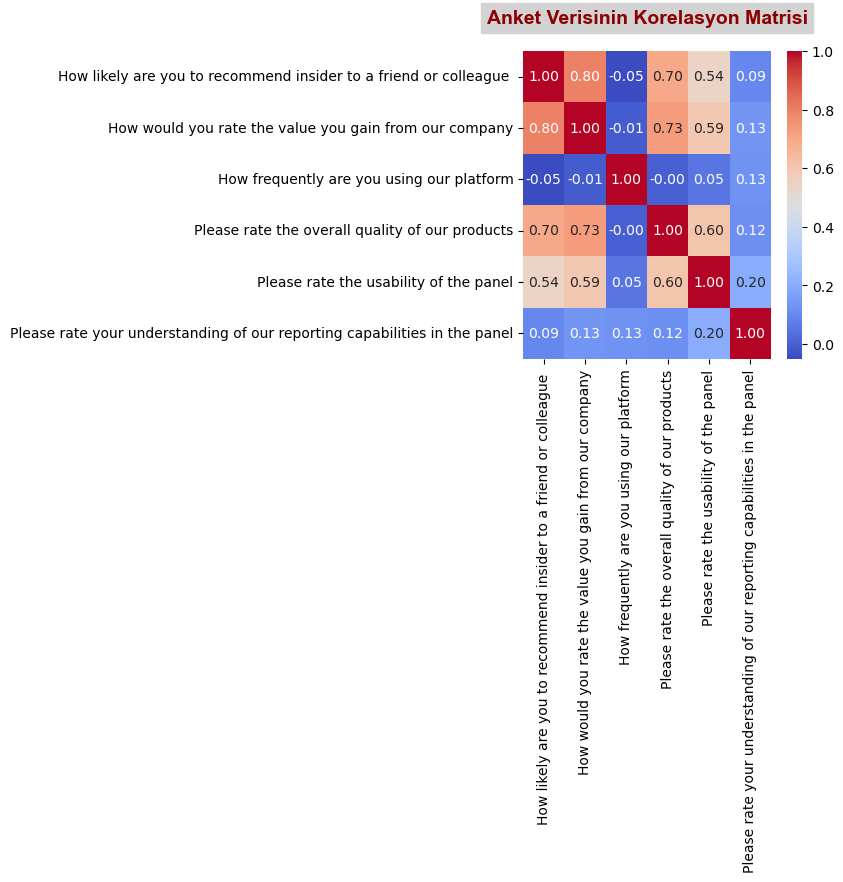

In [1514]:
plt.figure(figsize=(4, 4))
sns.heatmap(corr_survey.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Anket Verisinin Korelasyon Matrisi", fontsize=14, fontweight="bold",color="darkred", fontname="Arial", backgroundcolor="lightgray", pad=20)
plt.show()

## Korelasyon Analizi

- **Müşterilerin şirketten kazandığı değer** ile **etraflarına önerme** arasında **0.80'lik** bir korelasyon var.  
- **Ürünlerin kalitesi** ile **etraflarına önerme** arasında **0.70'lik** bir korelasyon var.  
- **Ürünlerin kalitesi** ile **şirketten kazanılan değer** arasında **0.73'lük** bir korelasyon var.  

### Çıkarımlar:
- **Müşterilerin kazançlı hale getirilmesi** için çalışmalar yapılabilir, böylece yeni müşteriler çekilebilir.  
- **Ürün kalitesi iyileştirilmeli**. Daha kaliteli ürünler, müşterilerin önerme isteğini artırır.


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🧠 panel kullanılabilirliği</span>

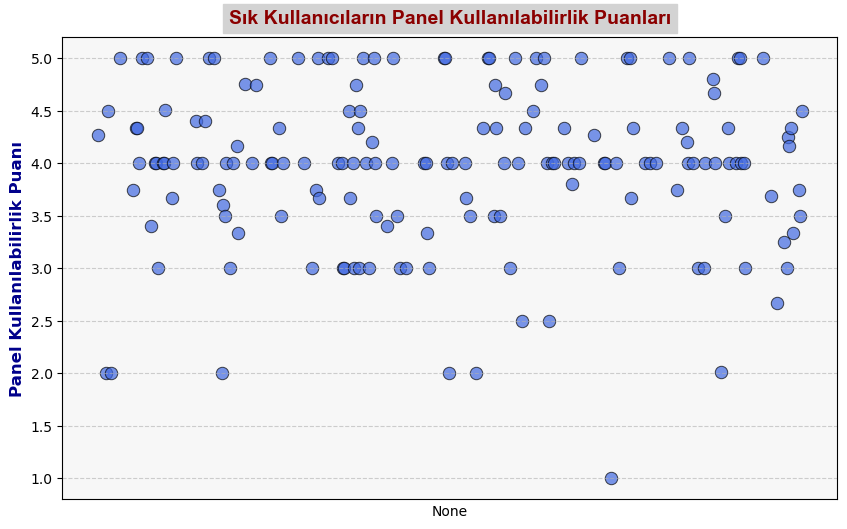

In [1517]:
# Platformu sık kullanan kullanıcıların ID'leri alındı
platformu_sık_kullananlar_ID = survey[survey["How frequently are you using our platform"] == 3]["Customer ID"]

# "Please rate the usability of the panel" sorularına ne yanıt verdiklerini incelemek için 
#  survey verisinden yukarıda sık kullanan kişilerin ID'lerinden yararlanıldı
anket_verisi = survey[survey["Customer ID"].isin(platformu_sık_kullananlar_ID)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=anket_verisi.index,  
    y=anket_verisi["Please rate the usability of the panel"], 
    color="royalblue", 
    edgecolor="black", 
    s=80, 
    alpha=0.7 
)

plt.xticks([])
plt.grid(axis="y", linestyle="--", alpha=0.6) 
plt.ylabel("Panel Kullanılabilirlik Puanı", fontsize=12, fontweight="bold", color="darkblue")
plt.title(
    "Sık Kullanıcıların Panel Kullanılabilirlik Puanları", 
    fontsize=14, fontweight="bold", color="darkred", fontname="Arial", backgroundcolor="lightgray", pad=10
)
plt.gca().set_facecolor("#f7f7f7") 

plt.show()


## 📑 Panel Kullanılabilirliği Analizi  

Panelin kullanılabilirliğini anlamak için **paneli sık kullanan müşteriler** seçildi ve ankette **panel kullanılabilirliği** sorusuna verdikleri yanıtlar alındı. Bu veriler üzerinden **scatter plot** çizildi.  

### Çıkarımlar  
- Verilerin çoğunun **3.5 - 5.0** bandında yoğunlaştığı görüldü. Bu **olumlu** bir sonuç gibi gözükebilir çünkü sık kullanan müşterilerin çoğu paneli iyi değerlendirmiş. Ancak bu müşteriler **paneli sık kullandığı için birçok şeyi öğrenmiş** olabilir, yani kendi başlarına adapte olmuş olabilirler.

- Asıl dikkat edilmesi gereken kısım:**3 ve altındaki kullanılabilirlik skorları** da önemli bir yığılma gösteriyor. Bu, **paneli sık kullanan müşterilerin bile memnun olmadığını** gösteriyor.  

### Önerilerim
Bu problemi çözmek için şirket şu adımları düşünebilir:  
- **Platform arayüzü yenilenebilir**, daha kullanıcı dostu hale getirilebilir.  
- **Platformu öğreten küçük adımlar (tutorial veya rehber)** eklenebilir.  
- **Daha sezgisel navigasyon** sağlanarak kullanıcıların aradıklarını daha kolay bulması sağlanabilir.  

Bu değişikliklerle müşteri deneyimi iyileştirilebilir ve memnuniyet artırılabilir.  


<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🧠 kaybedilen müşteriler </span>

#### 🛠️⬇️ Kayıp nedenlerine bakabilmek için kaybedilen müşterileri ayırdım

In [1520]:
kaybedilen_müşteriler = statusAndLevel[statusAndLevel["Status"]=="Churn"]

In [1521]:
kaybedilen_müşteriler

,Customer ID,Status,Customer Level
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail
8,CRM-1507900,Churn,Long-tail
10,CRM-484050,Churn,Long-tail
...,...,...,...
2647,CRM-1453850,Churn,Long-tail
2648,CRM-993300,Churn,Enterprise
2649,CRM-230750,Churn,Enterprise
2653,CRM-1494200,Churn,Long-tail


#### 🛠️⬇️ Kaybedilen müşterilerin anket verileri merge edilerek toplandı. merge fonksiyonunun how parametresini inner olarak belirleyerek iki tabloda da olan müşterilerin verisi alındı


In [1522]:
for_churn_survey = survey.copy()
for_churn_kaybedilen_müşteriler = kaybedilen_müşteriler.copy()
for_churn_kaybedilen_müşteriler = for_churn_kaybedilen_müşteriler.merge(for_churn_survey, on='Customer ID', how='inner')

In [1523]:
for_churn_kaybedilen_müşteriler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Customer ID                                                                50 non-null     object 
 1   Status                                                                     50 non-null     object 
 2   Customer Level                                                             50 non-null     object 
 3   How likely are you to recommend insider to a friend or colleague           50 non-null     float64
 4   How would you rate the value you gain from our company                     50 non-null     float64
 5   How frequently are you using our platform                                  50 non-null     float64
 6   Please rate the overall quality of our products              

#### 🛠️⬇️ Müşterinin, taleplerine olan dönüşü kaybedilmelerinde etkili mi onu öğrenmek için merge edildi talep verileri

In [1524]:
for_help_survey = survey.copy()
for_help_kaybedilen_müşteriler = help_Ticket.copy()
for_help_kaybedilen_müşteriler = for_help_kaybedilen_müşteriler.merge(for_help_survey, on='Customer ID', how='inner')

#### 📌⬇️ Taleplerin verisine bakıp kayıp müşterilerin ortalama talep sayısı karşılaştırıldı ve kaybedilen müşterilerin ortalama talep sayısı normalden fazla oluğu görüldü

In [1525]:
print(help_Ticket["Help Ticket Count"].mean())
print(for_help_kaybedilen_müşteriler["Help Ticket Count"].mean())

17.397951719092905
26.708185053380785


## 📑 Talep Sayısının Azaltılması için Adımlar

Talep sayısını azaltarak kaybedilen müşterinin daha fazla olmaması sağlanabilir. Bunun için yapılabilecek bazı öneriler:

- Veriden de görüldüğü üzere kaybedilen müşteriler çok fazla talep oluşturmuş normale kıyasla. Oluşturulan talepler müşterileri bıktırabilir bu nedenle talep edilen sorunları şirketin **önceden tespit etmesi ve aksiyon alması** bu gibi müşterileri tutmaya yarayacaktır.

- Bir diğer önerim: **Sorunları önceden tahmin edecek sistemler** geliştirilebilir. Sistemden belirli **verileri çekip, analiz edip, tahmin yoluyla sorunu anlayıp harekete** geçilebilir.
  
- Son olarak, müşterilerin **platform hakkında doğru bilgiye sahip olması** talep sayısını azaltabilir. Bir şekilde müşterileri platform hakkında eğitmek yararlı olacaktır.

<span style="color:#7F7FFF; font-weight:bold; font-size:25px;">🧠 Bülten etileşimi ve platformu sık kullanan müşteriler arasındaki ilişki</span>


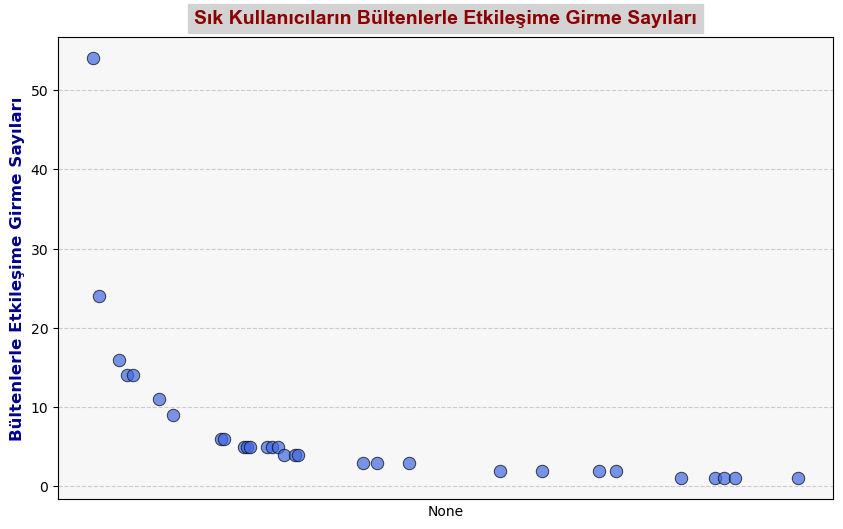

In [1528]:
# Platformu sık kullanan kullanıcıların ID'leri alındı
platformu_sık_kullananlar_ID = survey[survey["How frequently are you using our platform"] == 3]["Customer ID"]

# Bülten etkileşimi dataframe'inden platformu sık kullanan müşterilerin etkileşim sayılarını almak için bülten_verisi oluşturuldu
bülten_verisi = newsletter_Interaction[newsletter_Interaction["Customer ID"].isin(platformu_sık_kullananlar_ID)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=bülten_verisi.index,  
    y=bülten_verisi["Company Newsletter Interaction Count"], 
    color="royalblue", 
    edgecolor="black", 
    s=80, 
    alpha=0.7 
)

plt.xticks([])
plt.grid(axis="y", linestyle="--", alpha=0.6) 
plt.ylabel("Bültenlerle Etkileşime Girme Sayıları", fontsize=12, fontweight="bold", color="darkblue")
plt.title(
    "Sık Kullanıcıların Bültenlerle Etkileşime Girme Sayıları", 
    fontsize=14, fontweight="bold", color="darkred", fontname="Arial", backgroundcolor="lightgray", pad=10
)
plt.gca().set_facecolor("#f7f7f7") 

plt.show()


## 📑 Sık Kullanıcıların Bülten Etkileşimi 

Sık kullanıcıların bültenlerle daha fazla etkileşime girebilme potansiyeline sahip olduğu varsayımından hareketle bir karşılaştırma yapıldığında, grafik üzerinde müşterilerin büyük bir kısmının **etkileşim puanlarının düşük olduğu gözlemlendi**. Bu durum, birkaç açıdan değerlendirilebilir:

### Bültenlerle etkileşim olmamasının nedenleri olabilecek ihtimaller

  - Panelin kullanıcı dostu olmaması, navigasyon güçlükleri veya karmaşık tasarımı, kullanıcıların bültenlere erişimini ve etkileşimini zorlaştırabilir.
  - Sık kullanan müşteriler, panelde karşılaştıkları zorluklar nedeniyle bültenleri fark etmeyip etkileşimde bulunmuyor olabilir.
  - Bülten içeriklerinin güncelliği, ilgi çekici görseller veya yeterince etkileyici metinlerle desteklenmemesi, düşük etkileşim oranlarına yol açabilir.
  - İçeriğin kullanıcı beklentilerini karşılamaması, etkileşimi azaltan bir diğer faktör olabilir.
  - Sık kullanıcıların paneli düzenli kullanmasına rağmen, etkileşimde bulunmamalarının nedeni, panelin yeterince teşvik edici olmaması veya kullanıcı alışkanlıklarının farklı olması olabilir.
  - Kullanıcıların bültenlere erişim ve etkileşim stratejileri, platformun sunduğu özelliklerle uyumlu olmayabilir.

### Önerilerim

  - Kullanıcı deneyimini iyileştirecek **basit ve anlaşılır bir tasarım** uygulanabilir.
  - Kullanıcı geri bildirimleri doğrultusunda, paneldeki **navigasyon ve etkileşim adımları sadeleştirilebilir**.
  - Bülten içerikleri,** görsel ve interaktif öğelerle** zenginleştirilebilir.
  - İçeriklerin daha **dinamik ve ilgi çekici** hale getirilmesi, kullanıcıların dikkatini çekebilir.
  - Panel kullanımına ilişkin **kısa rehberler, ipuçları veya eğitim materyalleri** sunarak, kullanıcıların platformu daha etkin kullanmaları sağlanabilir.
  - Kullanıcıların **yeni özelliklerden haberdar olmaları**, etkileşim oranlarını artırabilir.

### Sonuç

Grafikte görülen düşük etkileşim puanları, sık kullanılan müşterilerin bültenlere olan ilgisinin gerçekten düşük olduğu ya da panelde yaşanan kullanım zorlukları ve içerik çekiciliği eksikliğinin bir yansıması olabilir. Bu durum, hem panel tasarımının hem de içerik stratejisinin yeniden gözden geçirilerek iyileştirilmesi gerektiğini göstermektedir.
